In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#Importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import skew
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

In [ ]:
#Importing Dataset
df = pd.read_csv('/content/drive/MyDrive/SANS/datos-17001.csv',sep=';')

In [ ]:
df.head()

,date,RefSt,Sensor_O3,Temp,RelHum
0,21/06/2017 7:00,15.0,36.3637,21.77,53.97
1,21/06/2017 7:30,15.0,34.8593,25.50,42.43
2,21/06/2017 8:00,19.0,37.3510,27.97,34.93
3,21/06/2017 8:30,26.0,43.6993,29.41,32.07
4,21/06/2017 9:00,34.0,53.9600,30.20,30.83


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   date       1000 non-null   object 
 1   RefSt      1000 non-null   float64
 2   Sensor_O3  1000 non-null   float64
 3   Temp       1000 non-null   float64
 4   RelHum     1000 non-null   float64
dtypes: float64(4), object(1)
memory usage: 39.2+ KB


In [ ]:
from datetime import datetime
date_list = df['date'].tolist()
hours = []
for date in date_list:
  datetime_object = datetime.strptime(date, '%d/%m/%Y %H:%M')
  hour = datetime_object.hour
  hours.append(hour)

**Plotting Ozone as a function of Time**

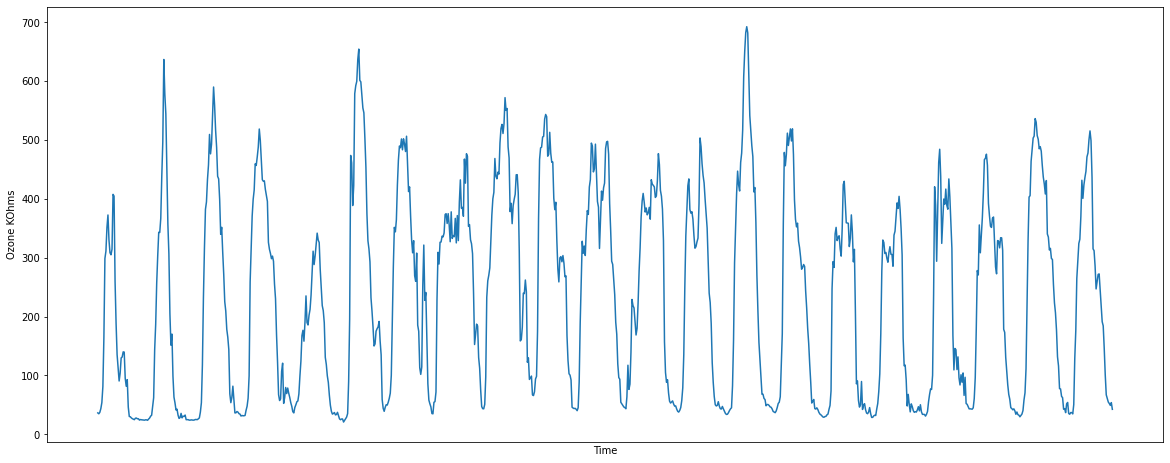

In [ ]:
plt.figure(figsize=(20, 8))
plt.plot(df['date'], df['Sensor_O3'])
plt.xlabel('Time')
plt.ylabel('Ozone KOhms')
plt.tick_params(axis='x',which='both', bottom=False, top=False, labelbottom=False)

By looking at the data, it is possible to see the trend of measured Ozone over time, by the sensor O3. The most important thing that can be noticed by analysing the plot is that these data have a periodicity. In particular it is possible to see how the measured Ozone levels have daily trends.

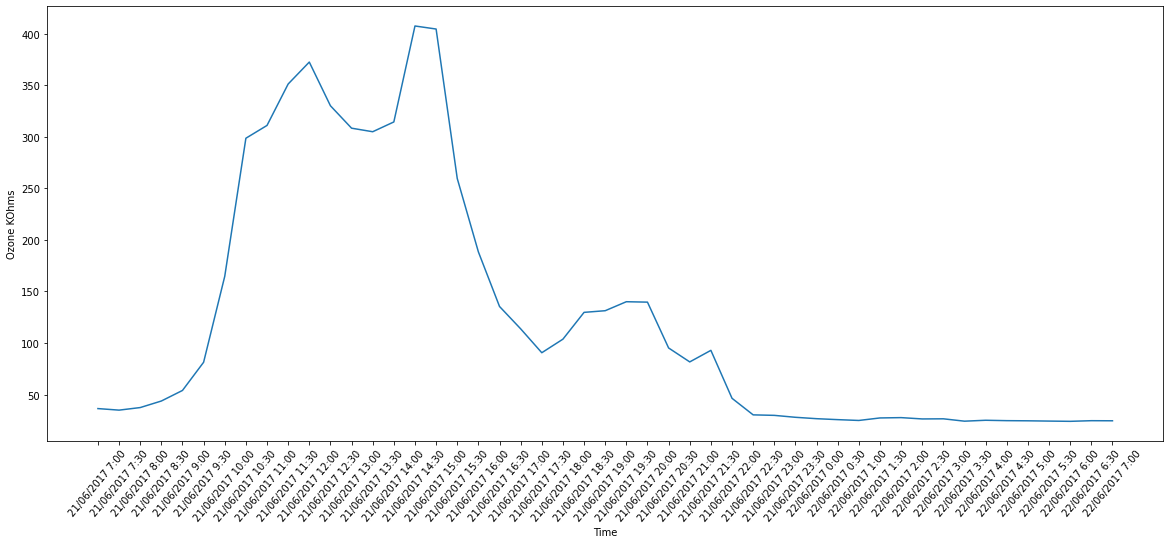

In [ ]:
plt.figure(figsize=(20, 8))
plt.xticks(rotation=50)
plt.xlabel('Time')
plt.ylabel('Ozone KOhms')
plt.plot(df[:49]['date'], df[:49]['Sensor_O3'])

Here it is shown the trend of the measured ozone levels during the first day. The amount of meausured ozone seems to be low in the early hours in the morning and then rises. In the end it goes back to lower levels in the evening. This could be explained because of the usage of vehicles during the most intense hours of the day. Also, by scientific research it is proved that the formation of ozone is favored by the sunlight.

**Plotting Ozone Reference as function of Time**

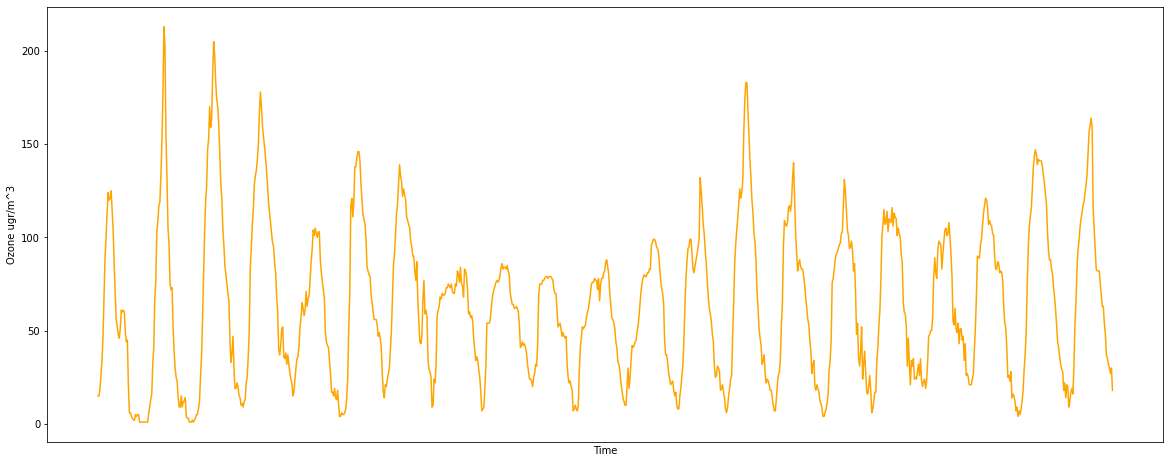

In [ ]:
plt.figure(figsize=(20, 8))
plt.xlabel('Time')
plt.ylabel('Ozone ugr/m^3')
plt.tick_params(axis='x',which='both', bottom=False, top=False, labelbottom=False)
plt.plot(df['date'], df['RefSt'],color='orange')

The plot of the reference station has the same trend of the one of the sensor O3. This seems reasonable since both the sensors measure the same chemical component in the atmosphere. By comparing the plot it seem that the Sensor O3 is a way more sensible than the reference station. 

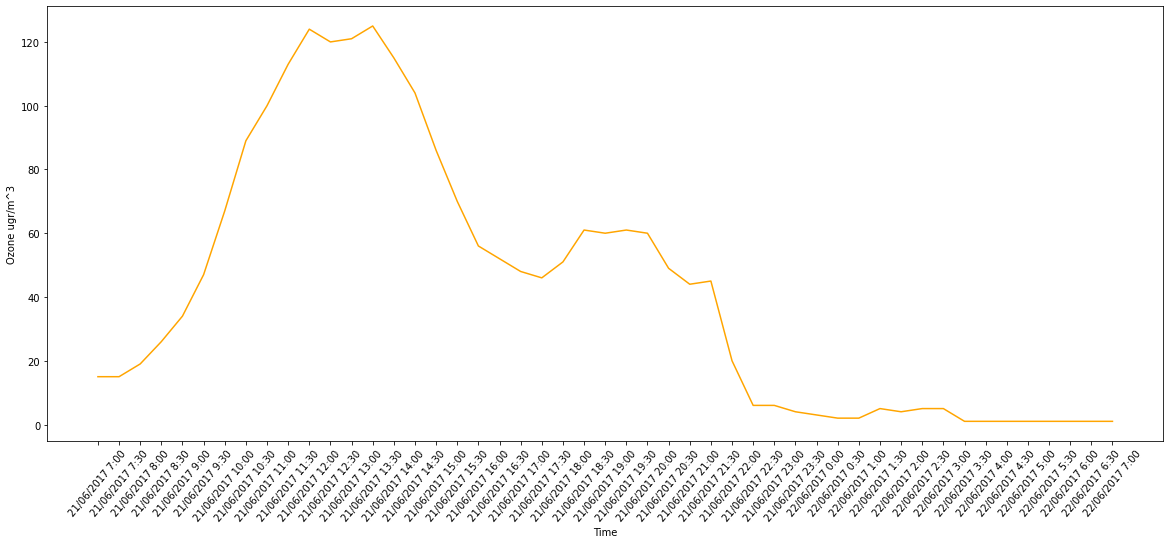

In [ ]:
plt.figure(figsize=(20, 8))
plt.xticks(rotation=50)
plt.xlabel('Time')
plt.ylabel('Ozone ugr/m^3')
plt.plot(df[:49]['date'], df[:49]['RefSt'],color='orange')

This plot illustrates a daily trend of the measured ozone by the reference station.

**Comparison of Ozone Reference and Sensor**

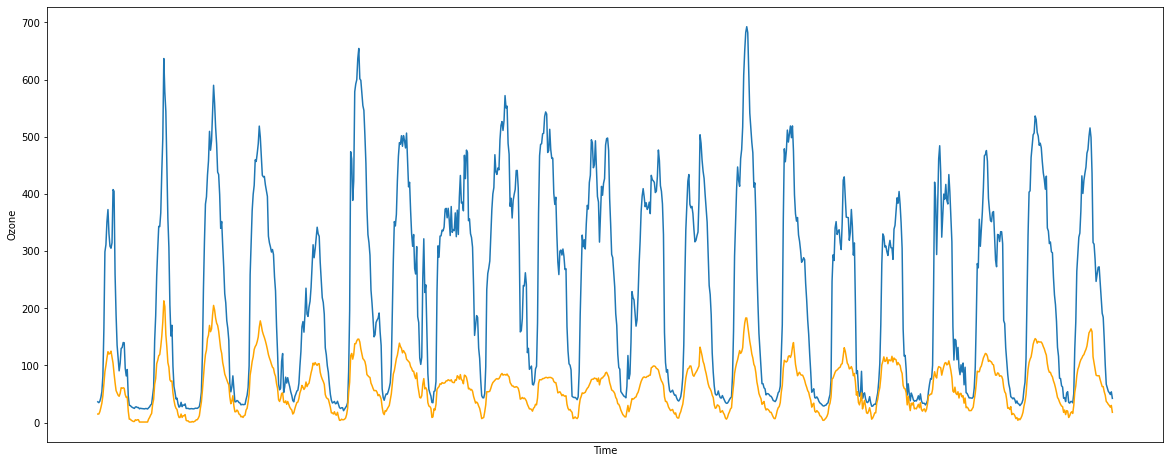

In [ ]:
plt.figure(figsize=(20, 8))
plt.xlabel('Time')
plt.ylabel('Ozone')
plt.tick_params(axis='x',which='both', bottom=False, top=False, labelbottom=False)
plt.plot(df['date'], df['Sensor_O3'])
plt.plot(df['date'], df['RefSt'],color="orange")

This plot shows an interesting correlation between the Sensor O3 and the Reference station. As already mentioned above, here it is possible to verify that the Sensor O3 makes more sensible measurements compared to the Reference station. The final goal is to find a good model that given the measurements of the Sensor O3, tries to predict what are the measurements of the reference station, that is a way more accurate.

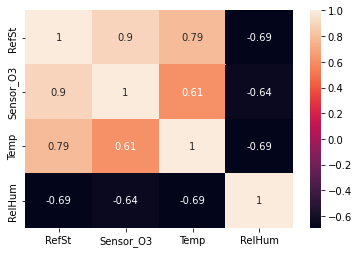

In [ ]:
plt.figure(figsize=(6, 4))
sns.heatmap(df.corr(), annot=True)

By looking at the correlation matrix it is possible to see how variables are correlated with each other. It is noticeable that Reference station and Sensor_O3 have a very strong correlation with each other. Furthermore, it seems that RefSt and Temp are positively correlated, it means that in days with high temperature measured ozone levels are high as well. On the other hand, it seems that ozone levels are negatively correlated with humidity. It means that higher ozone levels are recorded in days with low humidity. It makes sense since usually days with rain and lower temperature (for low temp, low ozonw) are the ones with highest humidity. In fact also variable Temp and Humidity are correlated with each other.

**Linear Dependence between Sensor and Reference Data**

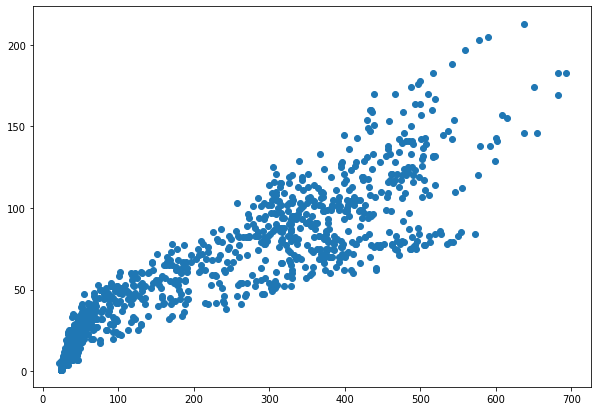

In [ ]:
sensor = df['Sensor_O3']
reference = df['RefSt']
plt.figure(figsize=(10,7))
plt.scatter(sensor, reference)
#plt.plot([0, 300], [0, 300],color='red') 

By looking at this plot it is possible to see that there is a linear dependence between the Sensor O3 and the Reference station. However, even if the two variables are linearly correlated, they are not spread along the bisector. In the final result, the more the model performs well, the closer to the bisector the points should be. In that case it means that predicted Ozone(x) and Reference station (y) have almost the same measurements. Hence y=x.

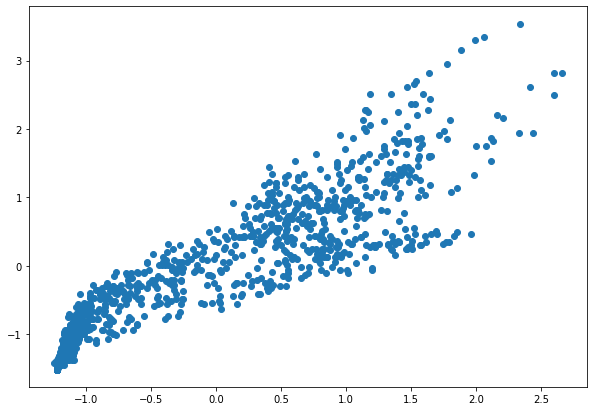

In [ ]:
sensor_norm = (df['Sensor_O3']-df['Sensor_O3'].mean())/df['Sensor_O3'].std()
reference_norm = (df['RefSt']-df['RefSt'].mean())/df['RefSt'].std()
plt.figure(figsize=(10,7))
plt.scatter(sensor_norm, reference_norm)
#plt.plot([-2, 3], [-2, 3],color='red') 

Here is is possible to see, that the normalization of the data do not change the pattern. It is still a linear dependence.

**Plots Compared to Temperature**

In [ ]:
from datetime import datetime
date_list = df['date'].tolist()
hours = []
for date in date_list:
  datetime_object = datetime.strptime(date, '%d/%m/%Y %H:%M')
  hour = datetime_object.hour
  hours.append(hour)


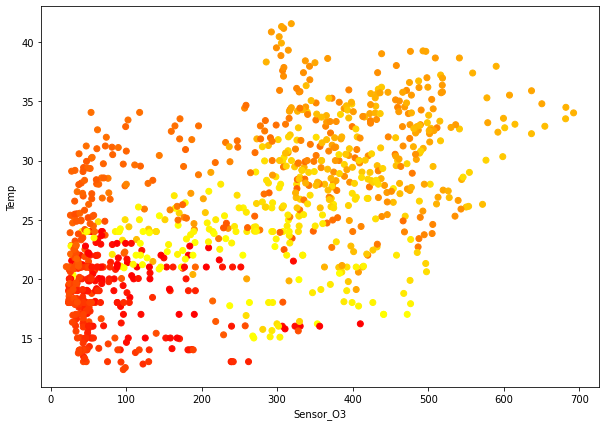

In [ ]:
sensor = df['Sensor_O3']
temp = df['Temp']
plt.figure(figsize=(10,7))
plt.xlabel('Sensor_O3')
plt.ylabel('Temp')
plt.scatter(sensor, temp,c = hours, cmap = plt.cm.autumn)

By looking at this plot, it doesn't seem that there is a clear pattern between the two variables. Red dots indicate the earlier hours of the day, where lower temperature corresponds. Orange dots indicate afternoon hours of the day. Also in this case, for afternoon points the measured ozone levels are higher. It can be seen that the highest levels of ozone have been measured in the afternoon hours. 

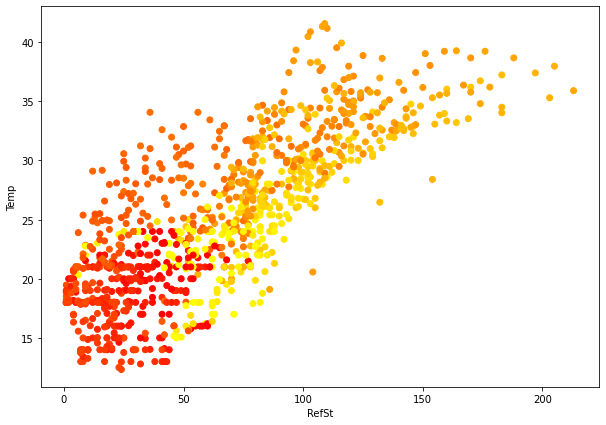

In [ ]:
sensor = df['RefSt']
temp = df['Temp']
plt.figure(figsize=(10,7))
plt.xlabel('RefSt')
plt.ylabel('Temp')
plt.scatter(sensor, temp,c = hours, cmap = plt.cm.autumn)

Here it seems that there is a stronger pattern, not perfectly linear though. This is because the Sensor O3 was more noisy than the reference station, so eventual patterns could have been hidden by the presence of noise. By looking at the trend it is evident that with hotter temperatures, Ozone levels are higher. Red indicates early hours of the day, orange indicates afternoon hours and yellow indicates evening hours. As already mentioned, the highest temperatures are measured in the afternoon (orange), where higher ozone levels correspond.

**Plots Compared to Humidity**

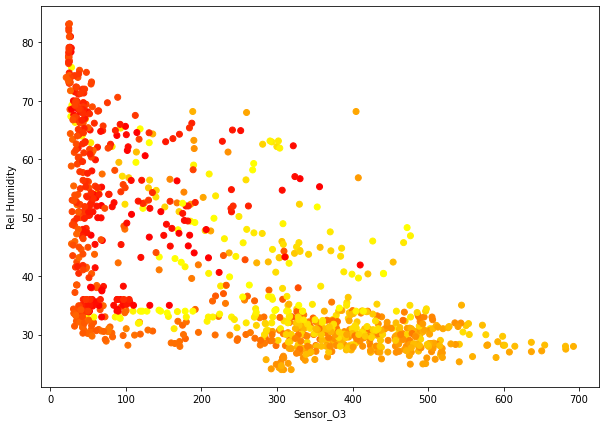

In [ ]:
sensor = df['Sensor_O3']
humidity = df['RelHum']
plt.figure(figsize=(10,7))
plt.xlabel('Sensor_O3')
plt.ylabel('Rel Humidity')
plt.scatter(sensor, humidity, c = hours, cmap = plt.cm.autumn )

In this case it is possible to see how there is a small cluster of red dots for low values of the Sensor O3 variable. Also it is possible to see another cluster on the right, for orange dots. However there is not a very clear pattern. Red means early hours of the day, Orange indicates mid day hours, while yellow means early hours of the day. It possible to see that orange points have higher ozone levels, while more dark points corresponding to earlier hours have lower ozone levels. 

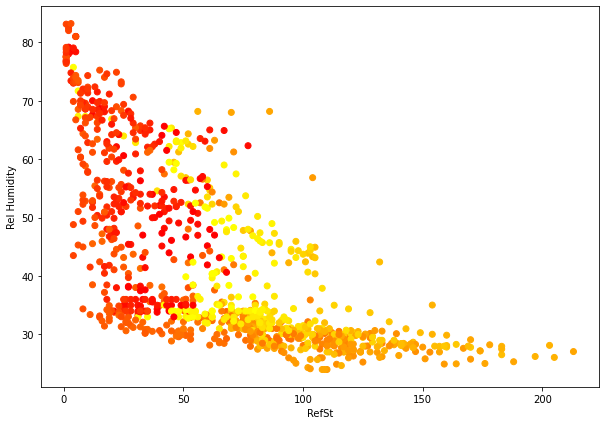

In [ ]:
sensor = df['RefSt']
humidity = df['RelHum']
plt.figure(figsize=(10,7))
plt.xlabel('RefSt')
plt.ylabel('Rel Humidity')
plt.scatter(sensor, humidity,c = hours, cmap = plt.cm.autumn)
#CHECK HOURS

Also in this case it seems that there is not a very strong pattern. However, in this plot there is a clearer behavior than in the previous one. In particular it can be noticed that for high humidity , ozone is low, while for low humidity ozone is higher. Nevertheless, since humidity is negatively correlated with temperature (correlation matrix plot above), this result could be also an undirected effect of correlation between ozone and temperature.

**Multiple Linear Regression**

In [ ]:
x = df.drop(['date','RefSt'],axis=1)
y = df.drop(['date','Sensor_O3','RelHum','Temp'],axis=1)

In [ ]:
#Shuffle data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 42)

In [ ]:
x_train

,Sensor_O3,Temp,RelHum
541,372.8670,31.30,29.03
440,535.5467,25.30,32.00
482,380.0287,25.17,32.23
422,241.9060,13.00,52.00
778,292.3563,40.87,24.13
...,...,...,...
106,382.2070,34.93,29.60
270,209.2587,22.63,43.13
860,43.0047,18.03,43.77
435,466.8127,24.90,32.43


In [ ]:
lr = LinearRegression()
# fitting the training data
lr.fit(x_train,y_train)

LinearRegression()

In [ ]:
y_prediction =  lr.predict(x_train)

In [ ]:
#Metrics for training data
r2 =r2_score(y_train,y_prediction)
mse = mean_squared_error(y_train,y_prediction)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_train,y_prediction)
print('R2 =',r2)
print('MSE =',mse)
print('RMSE =',rmse)
print('MAE =',mae)

R2 = 0.8907681244018592
MSE = 189.1949450704084
RMSE = 13.754815341196275
MAE = 10.876127529042263


In [ ]:
y_prediction =  lr.predict(x_test)

In [ ]:
#Metrics for testing data
r2 =r2_score(y_test,y_prediction)
mse = mean_squared_error(y_test,y_prediction)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test,y_prediction)
print('R2 =',r2)
print('MSE =',mse)
print('RMSE =',rmse)
print('MAE =',mae)

R2 = 0.9068814291209157
MSE = 169.25390365343313
RMSE = 13.009761859981648
MAE = 9.896206793974423


By comparing the data, the metrics seem to be quite good. Furthermore, it doesn't seem that the model is overfitting the data. In that case it would have resulted in excellent performance in the training set but poor performance in the test set, but this is not the case. The model seems to generalize well.

R2 = measure that represents the proportion of the variance for a dependent variable that's explained by an independent variable. It explains to what extent the variance of one variable explains the variance of the second variable. 1-SSres/SStot. In this case 90% of the observed variation is explained by the model's inputs. So the model is catching a lot of the information. For R2 = 1, the data would fall exactly on the regression line.

MSE = mean squared error is the average of squared difference between actual and predicted data. Measures the variance of residuals.

RMSE = squared root of MSE, standard deviation of residuals.

MAE = mean absolute error is the average of the absolute error between the actual and predicted data. Measures the average of residuals in the dataset. So on average for each point the model is giving results around 9.89 far from the actual value.



In [ ]:
print("Intercept: ",lr.intercept_)

Intercept:  [-32.34546158]


In [ ]:
#Coefficients
coefficients = pd.concat([pd.DataFrame(x_train.columns),pd.DataFrame(np.transpose(lr.coef_))], axis = 1)
coefficients

,0,0
0,Sensor_O3,0.155746
1,Temp,2.497773
2,RelHum,-0.053339


To notice the negative coefficient of Humidity. By looking at the scatter, when Humidity increases Ozone decreases. This result was already confirmed by correlation analysis.

In [ ]:
prediction = lr.predict(x)

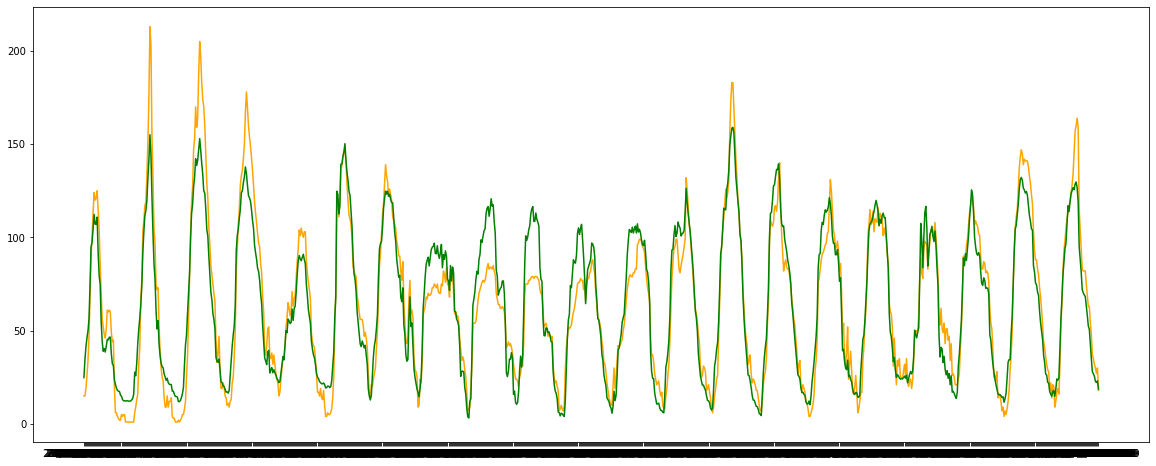

In [ ]:
plt.figure(figsize=(20,8))
plt.plot(df['date'],df['RefSt'],color='orange')
plt.plot(df['date'],prediction,color='green') 

Here it is shown how the Linear regression model performs on the whole dataset. The model corresponds to the green line, the yellow one corresponds to the reference station.

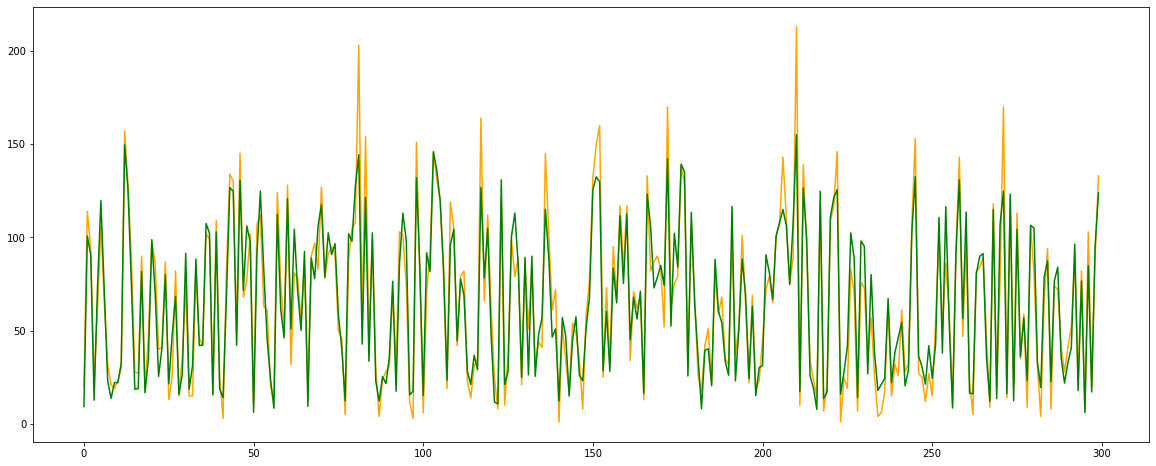

In [ ]:
#FOR EACHPOINT OF THE TEST, WE COMPUTE THE Y TRUE AND THE Y PREDICTED. 
plt.figure(figsize=(20,8))
plt.plot(range(0,len(x_test)),y_test,color='orange')
plt.plot(range(0,len(x_test)),y_prediction,color='green') #Here is included both test and train data


Here it is shown how Linear regression performs on never seen data, test set. In this case periodicity of data cannot be seen since data were shuffled at the beginning. The plot simply shows for each value of the Reference Station, what is the prediction of the model. The model seems calibrating the sensor pretty well. The only value for which the model has some difficulties in catching the right values are the peaks. This could also because very high value of the reference station were outliers, so usually is a good idea doing an outliers analysis before applying ML techniques.

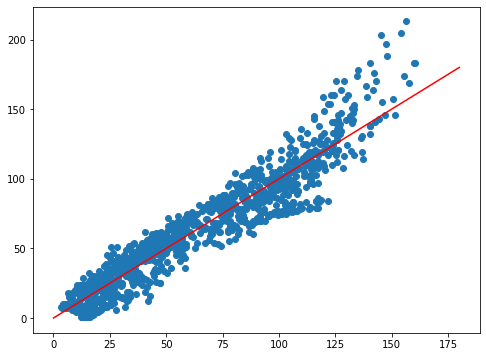

In [ ]:
#Scatter
plt.figure(figsize=(8,6))
plt.scatter(prediction, df['RefSt'])
plt.plot([0, 180], [0, 180],color='red') 

Prediction of the model over the whole dataset.

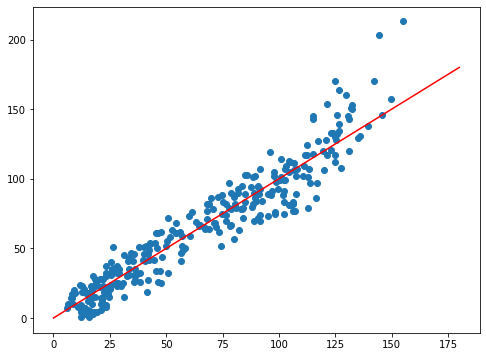

In [ ]:
#Scatter
plt.figure(figsize=(8,6))
plt.scatter(y_prediction,y_test)
plt.plot([0, 180], [0, 180],color='red') 

Prediction only over unseen data. In this case it can be seen that the model approximates pretty well the Reference Station, in fact data seem to be spread along the bisector line. The closer they are to the red line, the lower is the error.

**Multiple Linear Regression - Bayesian Framework**

Standard Linear Regression gives as output parameters and predictions, whereas Bayesian Linear Regression gives as output distributions over the parameters. So, by using it we are able to plot the posterior distribution of the parameters and compute their mean and variance. This is done by running a simulation of MCMC, using GLM.

Bayesian inference is a method in which we use Bayes’ Theorem to update our understanding of a probability or a parameter as we gather more data and evidence.

In [ ]:
import pymc3 as pm
from pymc3 import glm

In [ ]:
basic_model = pm.Model()
with basic_model:
  # specify glm and pass in data. The resulting linear model, its likelihood and all its parameters are automatically added to our model.
  pm.glm.GLM.from_formula(
        "RefSt ~ Sensor_O3 + Temp + RelHum ", df)
  # obtain starting values via MAP
  start=pm.find_MAP()
  step = pm.NUTS(scaling=start) # No-U-Turn Sampler to avoid setting the number of steps (it adjust autom.) # draw 2000 posterior samples (trace keeps samples for sensor_1, sensor_2 and offset)
  trace = pm.sample(2000, step, start=start, progressbar=False)

  #Parameters
  theta_0=np.mean(trace['Intercept'])
  theta_0_std = np.std(trace['Intercept'])
  theta_1=np.mean(trace['Sensor_O3'])
  theta_1_std = np.std(trace['Sensor_O3'])
  theta_2=np.mean(trace['Temp'])
  theta_2_std = np.std(trace['Temp'])
  theta_3=np.mean(trace['RelHum'])
  theta_3_std = np.std(trace['RelHum'])


The glm module is deprecated and will be removed in version 4.0
We recommend to instead use Bambi https://bambinos.github.io/bambi/
WARNING (theano.tensor.blas): We did not find a dynamic library in the library_dir of the library we use for blas. If you use ATLAS, make sure to compile it with dynamics library.
WARNING (theano.tensor.blas): We did not find a dynamic library in the library_dir of the library we use for blas. If you use ATLAS, make sure to compile it with dynamics library.


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  if __name__ == '__main__':
Sequential sampling (2 chains in 1 job)
NUTS: [sd, RelHum, Temp, Sensor_O3, Intercept]
Sampling 2 chains for 1_000 tune and 2_000 draw iterations (2_000 + 4_000 draws total) took 20 seconds.
The number of effective samples is smaller than 25% for some parameters.


We use a markov chain that approximates well the desired probability distribution. We draw the samples by looking a the states of the markov chain.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: The function `traceplot` from PyMC3 is just an alias for `plot_trace` from ArviZ. Please switch to `pymc3.plot_trace` or `arviz.plot_trace`.
  """Entry point for launching an IPython kernel.
Got error No model on context stack. trying to find log_likelihood in translation.
/usr/local/lib/python3.7/dist-packages/arviz/data/io_pymc3_3x.py:102: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  FutureWarning,
Got error No model on context stack. trying to find log_likelihood in translation.


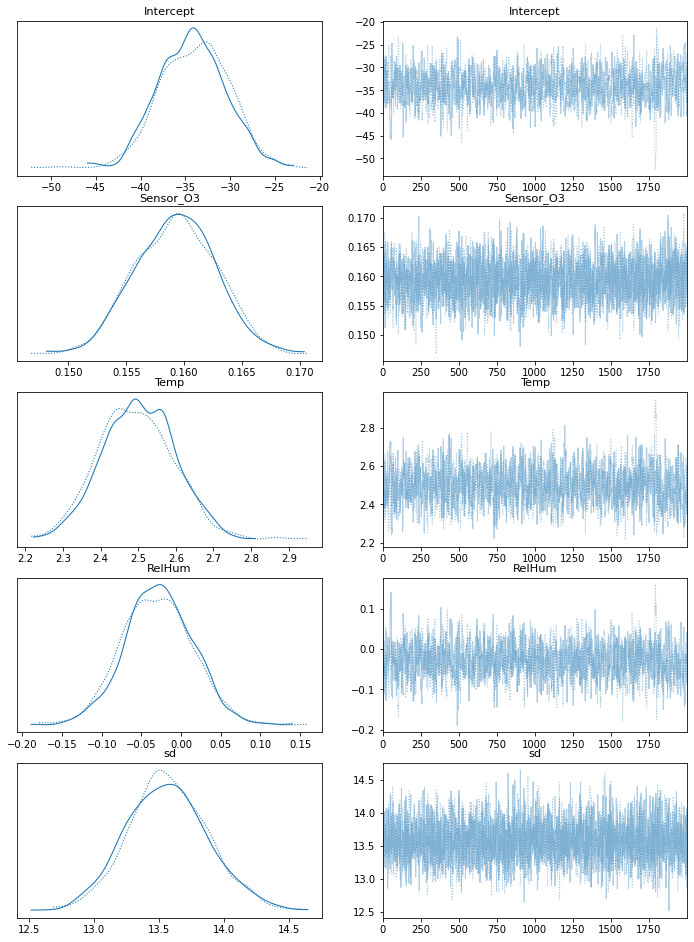

In [ ]:
pm.traceplot(trace, figsize = (12,16.5));

The MCMC is used to randomly generate samples from a distribution. In particular, MCMC generates a new sample by looking at the previous sample. Each sample is then kept or not based on how they fit the model. This random process, is repeated many times.

In [ ]:
print("Intercept = ",theta_0)
coeffs = [theta_1,theta_2,theta_3]
coefficients = pd.concat([pd.DataFrame(x_train.columns),pd.DataFrame(np.transpose(coeffs))], axis = 1)
coefficients

Intercept =  -34.11335278390604


,0,0
0,Sensor_O3,0.159288
1,Temp,2.498944
2,RelHum,-0.028864


Since the bayesian framework returns a distribution, the parameters are computed by computing the mean. Also in this case, the higher the temperature, the higher the ozone and the higher the humidity the lower the ozone (negative parameter).

In [ ]:
print("Std dev Intercept = ", theta_0_std)
devs = [theta_1,theta_2,theta_3]
devs = pd.concat([pd.DataFrame(x_train.columns),pd.DataFrame(np.transpose(devs))], axis = 1)
devs

Std dev Intercept =  3.8329918618765064


,0,0
0,Sensor_O3,0.159288
1,Temp,2.498944
2,RelHum,-0.028864


The parameter with the highest standard deviation is the one related to Temperature. Maybe, this can be explained because by looking at previous plots it cam be seen that the plot of Ref Station and Temperature was the one with the most unclear pattern.

**Prediction**


In [ ]:
y_prediction = theta_0 + theta_1*x_test['Sensor_O3'] + theta_2*x_test['Temp'] + theta_3*x_test['RelHum']

In [ ]:
r2 =r2_score(y_test,y_prediction)
mse = mean_squared_error(y_test,y_prediction)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test,y_prediction)
print('R2 =',r2)
print('MSE =',mse)
print('RMSE =',rmse)
print('MAE =',mae)

R2 = 0.9076171506993286
MSE = 167.916643556195
RMSE = 12.95826545322309
MAE = 9.882301210965284


In [ ]:
y_pred_plot = theta_0 + theta_1*x['Sensor_O3'] + theta_2*x['Temp'] + theta_3*x['RelHum']

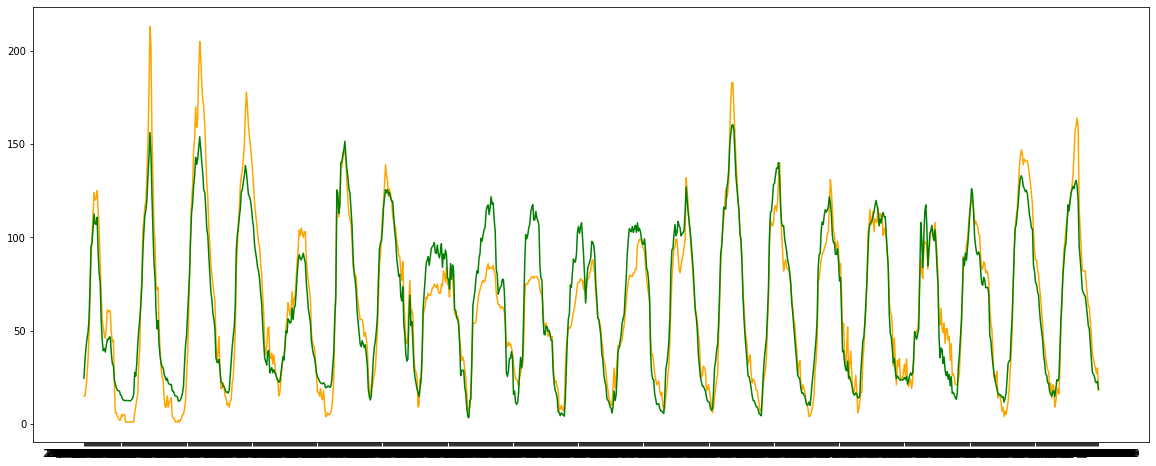

In [ ]:
x = df.drop(['RefSt','date'],axis=1)
prediction = y_pred_plot #Here are included test and train

plt.figure(figsize=(20,8))
plt.plot(df['date'],df['RefSt'],color='orange')
plt.plot(df['date'],prediction,color='green')

Comparison between Ref Station and predicted data over time, considering the whole dataset. The green one is the model, the orange is the reference station.

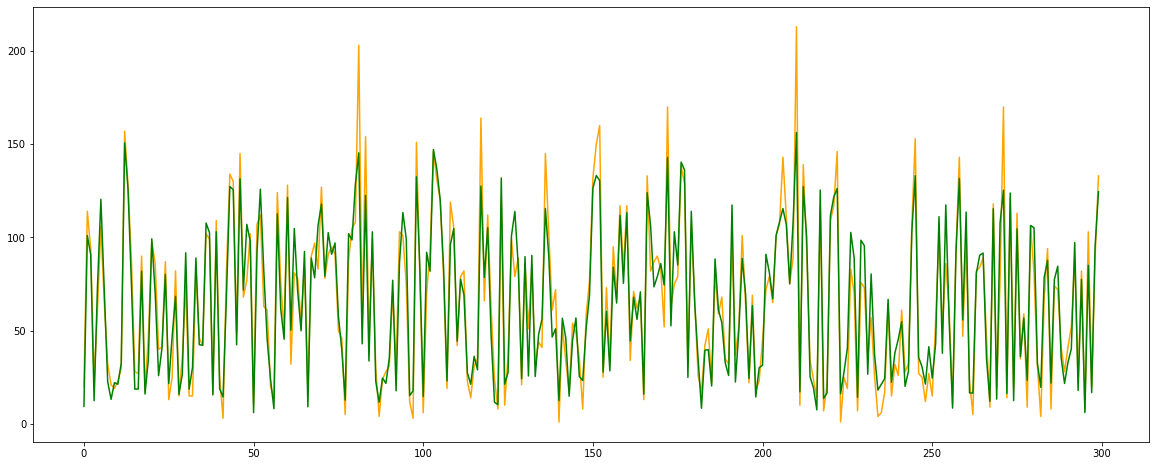

In [ ]:
x = df.drop(['RefSt','date'],axis=1)

plt.figure(figsize=(20,8))
plt.plot(range(0,len(x_test)),y_test,color='orange')
plt.plot(range(0,len(x_test)),y_prediction,color='green')

Comparison between Reference Station and prediction, only on unseen data (test set). Data are not in temporal sequence since the original dataset was shuffled. For each point, the plot simply shows the value of the Reference station and Calibrated sensor. The model achieves quite good results. Same reasoning of the frequentist framework can be done regarding the outliers.

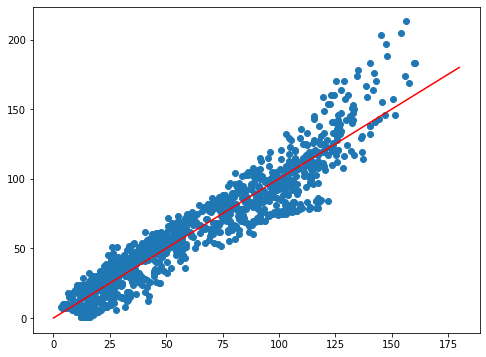

In [ ]:
#Scatter
plt.figure(figsize=(8,6))
plt.scatter(prediction, df['RefSt'])
plt.plot([0, 180], [0, 180],color='red') 

Scatter of predicted data compared to reference station, over the whole dataset.

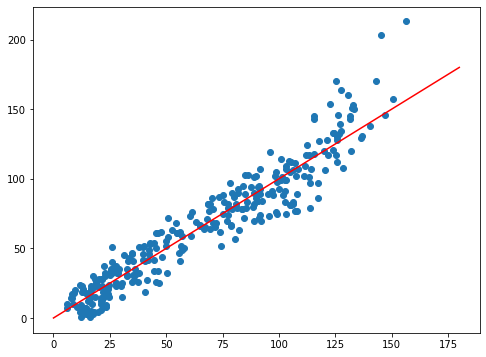

In [ ]:
#Scatter
plt.figure(figsize=(8,6))
plt.scatter(y_prediction, y_test)
plt.plot([0, 180], [0, 180],color='red') 

Scatter of predicted data compared to reference station, only unseen data (test set). Data are spread along the bisector, meaning that the prediction is quite accurate. The more the blue dots are close to the red line, the lower is the error.

**Comparison between the two models**

**Bayesian Framework**
For the bayesian framework, model parameters are treated as probability distribution. Posterior distirbution of parameters is updated once a new samples are seen, then at the next iteration, posterior distribution becomes the new prior and the process is repeated. In the end, the parameters are computed by looking at the mean of the last posterior distribution obtained.

**Frequentist Framework**
This approach looks for the parameters that minimize the RMSE, or MSE. Parameters are directly obtained.



**Comparison**
The two approaches compute the same results, in terms of the intercept and the parameters corresponding to the variables. 

VALUES FOR BAYESIAN APPROACH

R2 = 0.9076191942188905
MSE = 167.9129292201632
RMSE = 12.958122133247672
MAE = 9.884651866616197

VALUES FOR FREQUENTIST APPROACH

R2 = 0.9068814291209157
MSE = 169.25390365343313
RMSE = 13.009761859981648
MAE = 9.896206793974423

Also from the performance point of view the two models seem to achieve the same results.